In [2]:
import os 
import json
import sys 
sys.path.append(os.path.abspath("./scripts"))
from circuit_top_tools import *
from tools import * 

from scipy import sparse

In [3]:
outdir = "./circuit_topology_PCA_outdir/"
if not os.path.exists(outdir):
    os.makedirs(outdir)
    
data_path = "./circuit_topology_matrices/"
X_transformed = np.load(data_path + "all_sys_concat_incpca.npy")
psystem = ["wt_hiapp_apo", "wt_hiapp_yxi1", "wt_hiapp_yxa1", \
           "s20g_hiapp_apo", "s20g_hiapp_yxi1", "s20g_hiapp_yxa1"]

# # define system directories 
PCs_ordered = [np.load(data_path + "wt_hiapp_apo_PCs.npy"),
               np.load(data_path + "wt_hiapp_yxi1_PCs.npy"),
               np.load(data_path + "wt_hiapp_yxa1_PCs.npy"),
               np.load(data_path + "s20g_hiapp_apo_PCs.npy"),
               np.load(data_path + "s20g_hiapp_yxi1_PCs.npy"),
               np.load(data_path + "s20g_hiapp_yxa1_PCs.npy")]

WT_apo_dir = "./wt_hiapp_apo/outdir_wt_hiapp_apo/"
S20G_apo_dir = "./s20g_hiapp_apo/outdir_s20g_hiapp_apo/"
WT_A_outdir = "./wt_hiapp_yxa1/outdir_wt_hiapp_yxa1/"
WT_I_outdir = "./wt_hiapp_yxi1/outdir_wt_hiapp_yxi1/"
S20G_A_outdir = "./s20g_hiapp_yxa1/outdir_s20g_hiapp_yxa1/"
S20G_I_outdir = "./s20g_hiapp_yxi1/outdir_s20g_hiapp_yxi1/"

# wt apo, wt yxi1, wt yxa1, s20g apo, s20g yxi1, s20g yxa1
each_system_n_frames = []
for i in range(len(PCs_ordered)):
    each_system_n_frames.append(PCs_ordered[i].shape[0])
print("Number of frames in each system: ", each_system_n_frames)

Number of frames in each system:  [41501, 30500, 21222, 35501, 22898, 22750]


# Visualize the PCs 

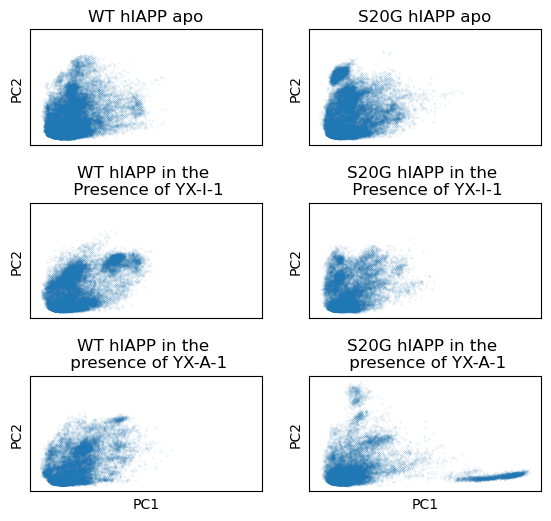

In [4]:
prev = 0 

fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True, sharex=True, figsize=(6.6, 6))
Titles = ["WT hIAPP apo", "WT hIAPP in the \n Presence of YX-I-1", "WT hIAPP in the \n presence of YX-A-1", 
            "S20G hIAPP apo", "S20G hIAPP in the \n Presence of YX-I-1", "S20G hIAPP in the \n presence of YX-A-1"]

ax_order = [0, 2, 4, 1, 3, 5]
for n, n_frames in enumerate(each_system_n_frames): 
    x = X_transformed[:,0][prev:prev+n_frames]
    y = X_transformed[:,1][prev:prev+n_frames]
    
    ax = axes.flatten()[ax_order[n]]
    ax.scatter(x,y,s=0.01, alpha=0.5)
    prev = prev+n_frames
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(Titles[n])
    ax.set_ylabel("PC2")
    if ax_order[n] > 3: 
        ax.set_xlabel("PC1")

plt.subplots_adjust(hspace=0.5)
plt.savefig(outdir+"scatter_plot_all_systems_on_same_space.pdf", dpi=400)

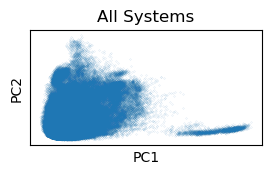

In [5]:
sys_colors = {
    "WT Apo": "tab:red",
    "WT + YX-A-1":"tab:green",
    "WT + YX-I-1":"tab:orange", 
    "S20G + YX-A-1" : "tab:green",
    "S20G + YX-I-1" : "tab:orange",
    "S20G Apo" : "tab:blue",    
}
labels = ["WT Apo", "WT + YX-I-1", "WT + YX-A-1", 
          "S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]
prev=0
color_order = []
plt.figure(figsize=(3.0, 1.5))
plt.scatter(X_transformed[:,0], X_transformed[:,1], s=0.01, alpha=0.5)
# ax_order = [0, 2, 4, 1, 3, 5]
# for n, n_frames in enumerate(each_system_n_frames): 
#     x = X_transformed[:,0][prev:prev+n_frames]
#     y = X_transformed[:,1][prev:prev+n_frames]
#     l = labels[n]
#     plt.scatter(x,y,s=0.01, alpha=0.5, c=sys_colors[l], label=l)
#     prev = prev+n_frames

plt.xticks([])
plt.yticks([])
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.title("All Systems")
# plt.legend()
plt.savefig(outdir + "scatter_plot_all_systems.pdf", dpi=400, bbox_inches="tight")

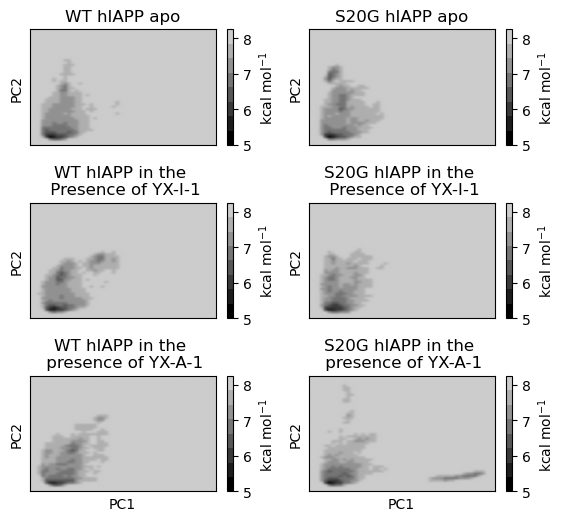

In [11]:
from matplotlib.colors import ListedColormap
# Create a list of distinct gray values
num_grays = 8
grays = np.linspace(0.0, 0.8, num_grays)
# Create a ListedColormap with distinct gray values
custom_pastel_gray_cmap = ListedColormap([(gray, gray, gray) for gray in grays])

fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True, sharex=True, figsize=(6.6, 6))
Titles = ["WT hIAPP apo", "WT hIAPP in the \n Presence of YX-I-1", "WT hIAPP in the \n presence of YX-A-1", 
            "S20G hIAPP apo", "S20G hIAPP in the \n Presence of YX-I-1", "S20G hIAPP in the \n presence of YX-A-1"]

prev = 0 
count = 0 
col_count = 0 
for n_frames in each_system_n_frames: 
    if count >= 3: 
        col_count = 1
    
    ax = axes[count%3, col_count]
    x = X_transformed[:,0][prev:prev+n_frames]
    y = X_transformed[:,1][prev:prev+n_frames]
    counts,xbins,ybins=np.histogram2d(y,x,bins=50,density=True, range=[[np.min(X_transformed[:,1])-50, np.max(X_transformed[:,1])+50], [np.min(X_transformed[:,0])-50, np.max(X_transformed[:,0])+50]]) # LogNorm()
    a = np.log(np.flipud(counts)+.000001)
    T = 300
    a = -(0.001987*T)*a

    im = ax.imshow(a, interpolation='gaussian', extent=[ybins[0], ybins[-1], 
                    xbins[0], xbins[-1]], cmap=custom_pastel_gray_cmap, aspect='auto', vmin=5, vmax = 8.25)
    ax.set_title(Titles[count])
    cbar = plt.colorbar(im, ax=ax, label='kcal mol$^{-1}$')
    ax.set_ylabel("PC2")
    if ax_order[count] > 3: 
        ax.set_xlabel("PC1")

    count += 1 
    ax.set_xticks([])
    ax.set_yticks([])
    prev = prev+n_frames
plt.subplots_adjust(hspace=0.5)
plt.savefig(outdir+"free_energy_all_systems_on_same_space.pdf", dpi=400)

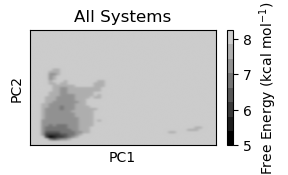

In [7]:
sys_colors = {
    "WT Apo": "tab:red",
    "WT + YX-A-1":"tab:green",
    "WT + YX-I-1":"tab:orange", 
    "S20G + YX-A-1" : "tab:green",
    "S20G + YX-I-1" : "tab:orange",
    "S20G Apo" : "tab:blue",    
}
labels = ["WT Apo", "WT + YX-I-1", "WT + YX-A-1", 
          "S20G Apo", "S20G + YX-I-1", "S20G + YX-A-1"]
prev=0
color_order = []
plt.figure(figsize=(3.0, 1.5))
x = X_transformed[:,0]
y = X_transformed[:,1]
counts,xbins,ybins=np.histogram2d(y,x,bins=50,density=True, range=[[np.min(X_transformed[:,1])-50, np.max(X_transformed[:,1])+50], [np.min(X_transformed[:,0])-50, np.max(X_transformed[:,0])+50]]) # LogNorm()
a = np.log(np.flipud(counts)+.000001)
T = 300
a = -(0.001987*T)*a

im = plt.imshow(a, interpolation='gaussian', extent=[ybins[0], ybins[-1], 
                xbins[0], xbins[-1]], cmap=custom_pastel_gray_cmap, aspect='auto', vmin=5, vmax = 8.25)
plt.colorbar(im, label='Free Energy (kcal mol$^{-1}$)')

plt.xticks([])
plt.yticks([])
plt.ylabel("PC2")
plt.xlabel("PC1")
plt.title("All Systems")
# plt.legend()
plt.savefig(outdir + "FE_plot_all_systems.pdf", dpi=400, bbox_inches="tight")

# KMeans Clustering of all states on same PCs (largest to smallest population)

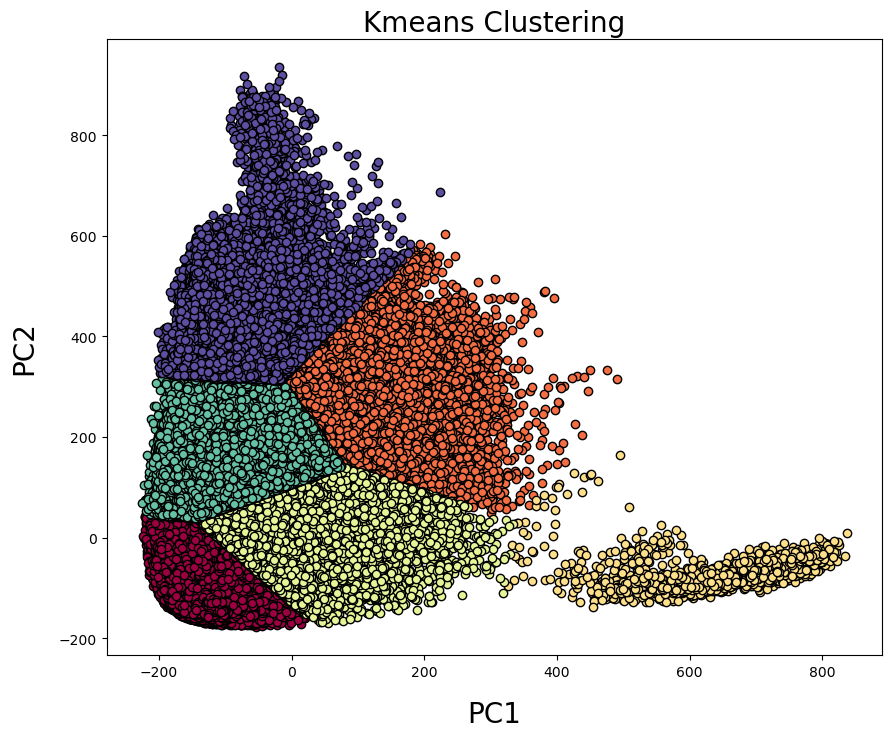

[82780, 13359, 2266, 29501, 33145, 13321]
[0 4 3 1 5 2]


In [ ]:
# import pickle 

# x = X_transformed[:,0]
# y = X_transformed[:,1]
# n_cluster = 6
# ax, kmean_labels, centers = kmeans_cluster(x, y, clusters=n_cluster, title = "Kmeans Clustering")
# plt.show()

# # Make a c_dict for total trajectory 
# total_c_dict = {}
# for c in range(n_cluster): 
#     total_c_dict[c] = np.where(kmean_labels==c)[0]

# # reorder Kmeans clusters based off H_total 
# reordered = {}
# pop_size = []
# for c in range(len(total_c_dict.keys())):
#     frame_ind = total_c_dict[c]
#     pop_size.append(frame_ind.shape[0])
# reordered_ids = np.argsort(pop_size)[::-1]

# print(pop_size)
# print(reordered_ids)
# count = 0 
# for ids in reordered_ids: 
#     reordered[count]= total_c_dict[ids] 
#     count +=1

# total_c_dict = reordered

# ################################################
# # save each Kmeans cluster relative to the trajectory 
# all_dirs = [WT_apo_dir, WT_I_outdir, WT_A_outdir, S20G_apo_dir, S20G_I_outdir, S20G_A_outdir]
# prev = 0 
# count = 0 
# num_clusters = [6, 6, 6, 6, 6, 6]
# for n_cluster, n_frames in zip(num_clusters, each_system_n_frames):
#     current_range = np.arange(prev, prev+n_frames, 1)
    
#     # create a c_dict for each cluster  
#     c_dict = {}
#     for i in range(n_cluster):
#         ind = total_c_dict[i] # make sure all are taking from the same cluster 
#         ind = np.intersect1d(current_range, ind) - prev # make sure to account for offset 
#         c_dict[i] = ind

#     # save c_dict
#     with open(all_dirs[count] +"_concat_all_6c_kmeans_cluster_indices.pkl", "wb") as f: 
#         pickle.dump(c_dict, f)
    
#     # save PCs 
#     np.save(all_dirs[count] + "concat_all_incpca.npy", np.column_stack((x[prev:prev+n_frames], y[prev:prev+n_frames])))

#     # update next values 
#     del c_dict
#     prev = prev+n_frames
#     count += 1